In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sns.set(style="whitegrid")

In [8]:
# 1. Loading the Data 
df = pd.read_csv('train.csv')
# 2. Check for missing values in coordinates
missing_coords = df[['lat', 'long']].isnull().sum()
print(missing_coords.sum())
# 3. preview
print("Preview of Data:")
print(df[['id', 'lat', 'long']].head(3))    

0
Preview of Data:
           id      lat     long
0  9117000170  47.4362 -122.187
1  6700390210  47.4034 -122.187
2  7212660540  47.2704 -122.313


In [19]:
# MISSING VALUE CHECK
missing_data = df.isnull().sum()
print(missing_data)
print(missing_data[missing_data > 0])

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
Series([], dtype: int64)


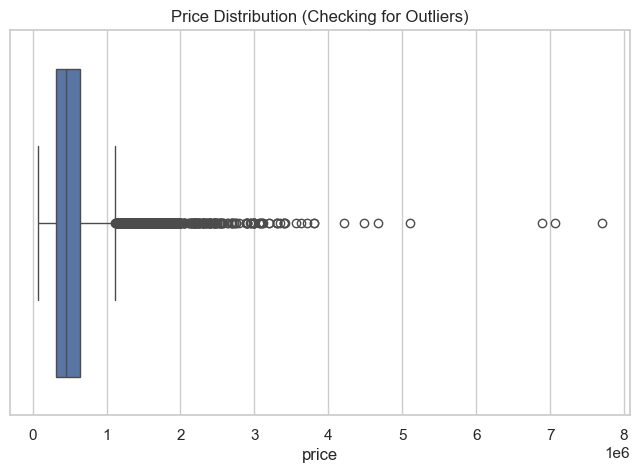

In [9]:
# OUTLIER DETECTION (Boxplot) 
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['price'])
plt.title("Price Distribution (Checking for Outliers)")
plt.show()

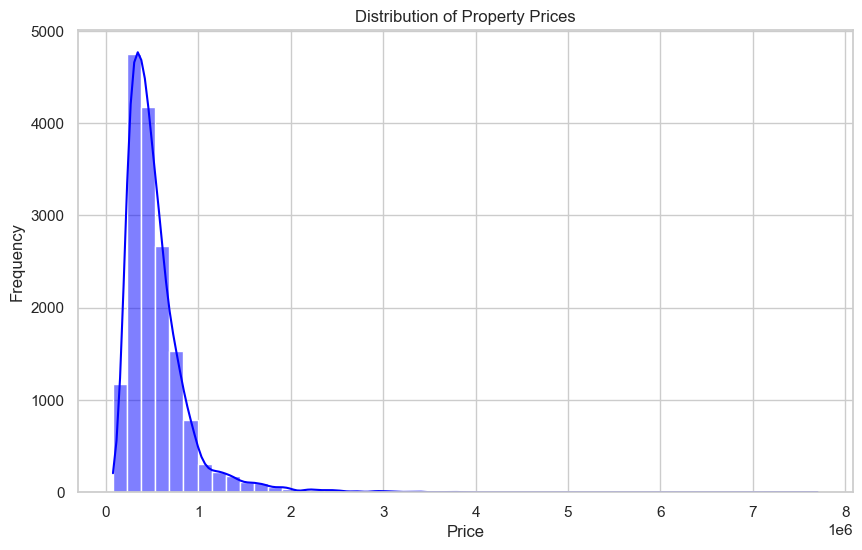

In [5]:
# --- PLOT A: Price Distribution ---
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50, color='blue')
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

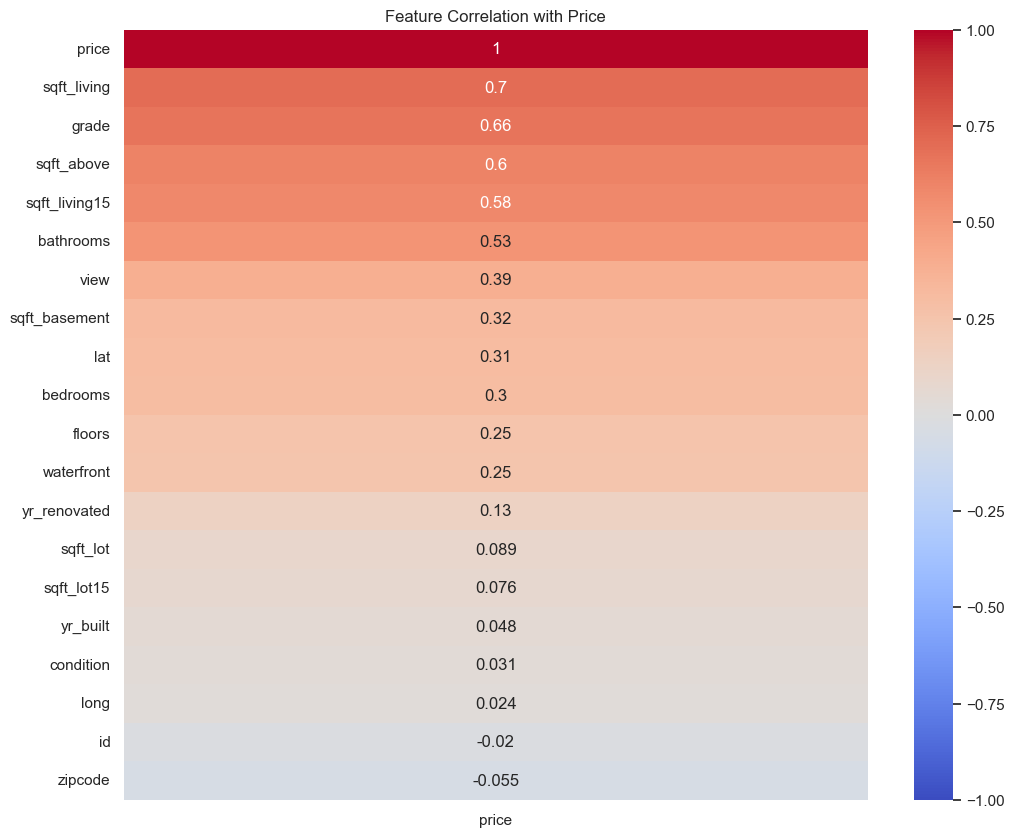

In [6]:
# --- PLOT B: Correlation Heatmap ---
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
sns.heatmap(corr[['price']].sort_values(by='price', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation with Price')
plt.show()

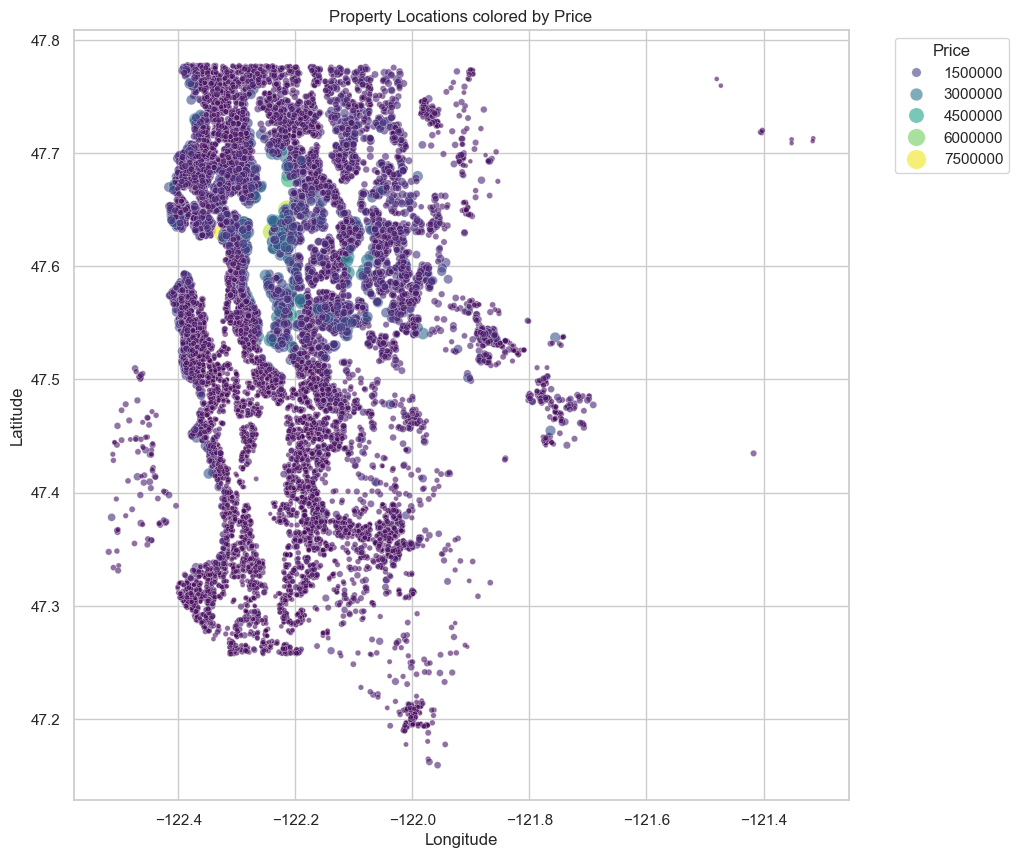

In [7]:
# --- PLOT C: Geospatial Price Map ---
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='long', y='lat', hue='price', 
                palette='viridis', size='price', sizes=(10, 200), alpha=0.6)
plt.title('Property Locations colored by Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Price', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

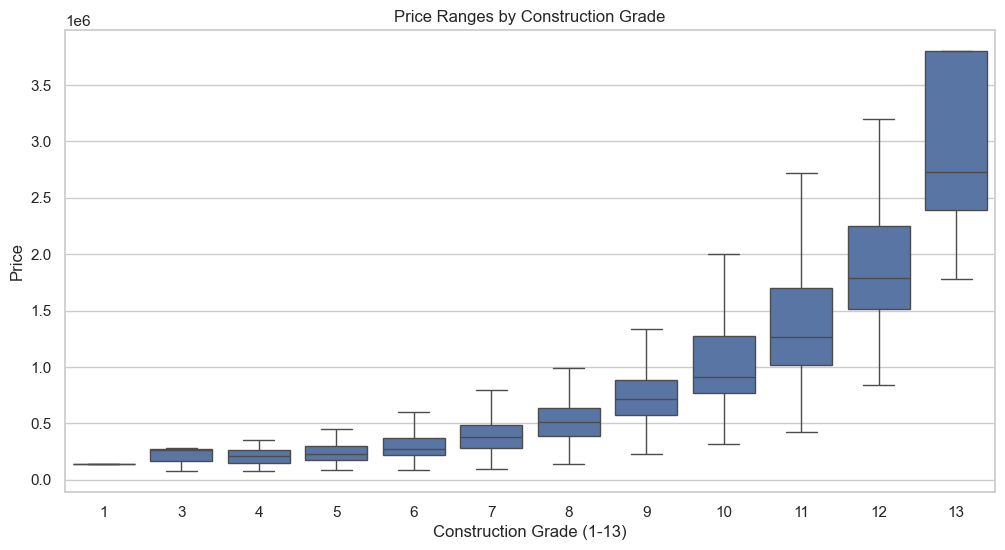

In [11]:
# --- PLOT D: The "Quality Curve" (Grade vs. Price) 
plt.figure(figsize=(12, 6))
sns.boxplot(x='grade', y='price', data=df, showfliers=False) 
plt.title('Price Ranges by Construction Grade')
plt.ylabel('Price')
plt.xlabel('Construction Grade (1-13)')
plt.show()

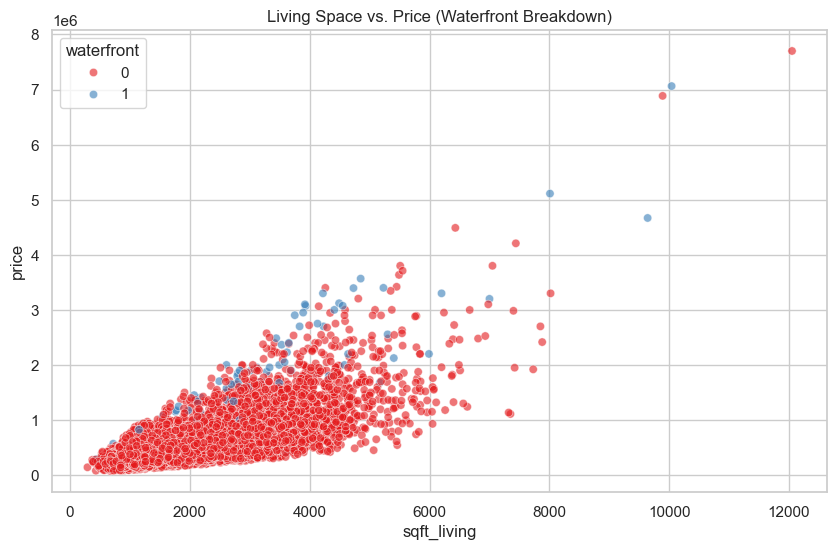

In [8]:
# --- PLOT E: The "Waterfront Premium" (Interaction Effect) 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', hue='waterfront', data=df, alpha=0.6, palette='Set1')
plt.title('Living Space vs. Price (Waterfront Breakdown)')
plt.show()

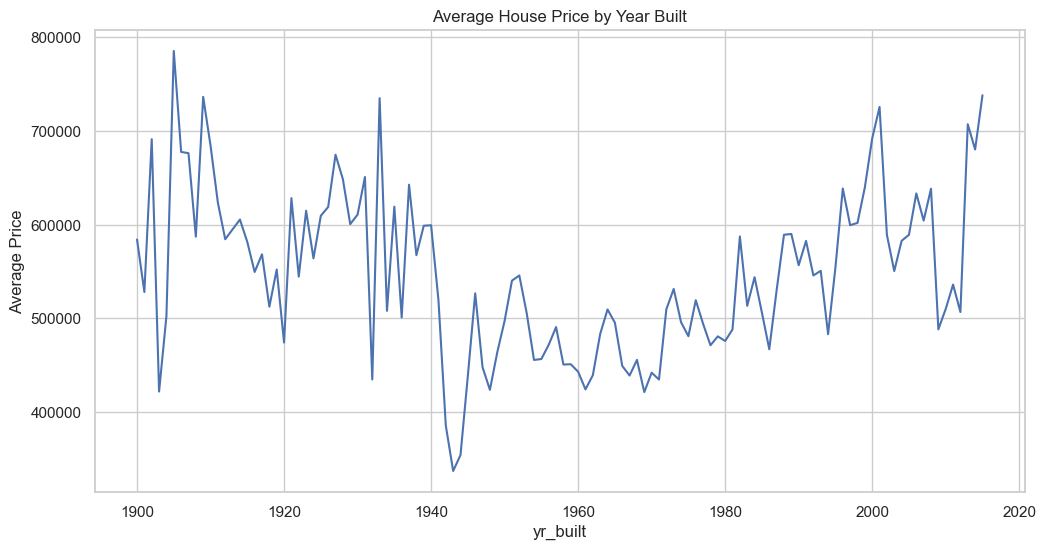

In [9]:
# --- PLOT F: Age of Home vs. Value 
plt.figure(figsize=(12, 6))
df.groupby('yr_built')['price'].mean().plot()
plt.title('Average House Price by Year Built')
plt.ylabel('Average Price')
plt.show()

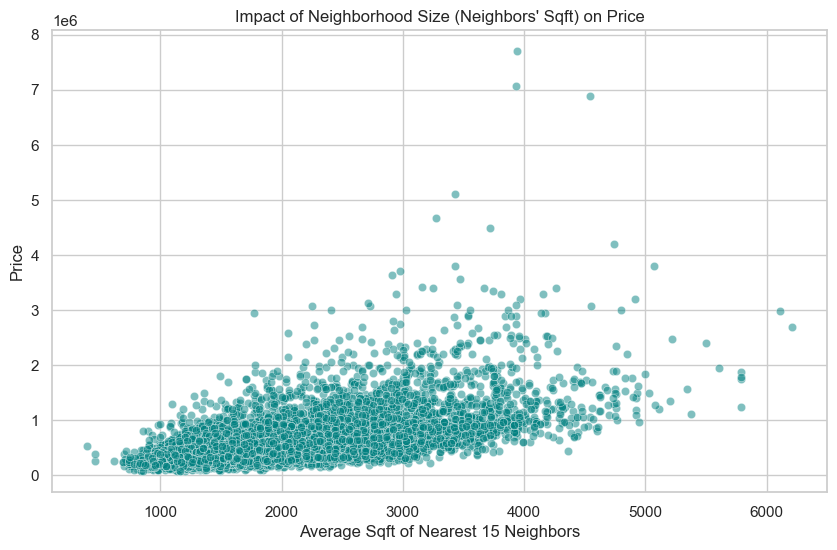

In [10]:
# --- PLOT G: Neighborhood Density (House vs. Neighbors) 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living15', y='price', data=df, alpha=0.5, color='teal')
plt.title('Impact of Neighborhood Size (Neighbors\' Sqft) on Price')
plt.xlabel('Average Sqft of Nearest 15 Neighbors')
plt.ylabel('Price')
plt.show()

## **Financial & Visual Insights: Decoding "Curb Appeal"**

Through geospatial and exploratory analysis, we identified three critical visual drivers that influence property valuation beyond simple square footage. These insights quantify the "curb appeal" and environmental context of the housing market.

**1. The "Blue Space" Premium (Waterfront Impact)**

* **Visual Insight:** Properties with water views constitute a distinct luxury market segment. As shown in the *Living Space vs. Price* analysis, the "Waterfront" attribute does not merely add a fixed value; it steepens the price-per-square-foot curve.
* **Financial Impact:** A waterfront home commands a significantly higher multiplier on its living space. Buyers are paying not just for the utility of the house, but for the scarcity of the visual environment.

**2. Neighborhood Density (Trees vs. Concrete)**

* **Visual Insight:** using `sqft_living15` (size of nearest 15 neighbors) as a proxy for neighborhood density, we observed a strong positive correlation with price.
* **Interpretation:**
* **Low Density (Greenery):** Small neighbor homes on large lots often indicate older, less developed, or rural areas, correlating with lower prices despite the "green" space.
* **High Density (Estate/Urban):** Large neighbor homes imply a wealthy, developed estate ("Concrete/Structured" wealth).


* **Conclusion:** In this market, value is driven by **social clustering** (being near other large homes) rather than just isolation/lot size.

**3. The "Quality Curve" (Construction Grade)**

* **Visual Insight:** The relationship between Construction Grade (1-13) and Price is **exponential**, not linear.
* **Financial Impact:** Grades 1-9 show a gradual linear increase in value. However, breaking past Grade 10 triggers a massive valuation spike. This suggests that "High-End Architectural Design" (visible curb appeal) has a disproportionate ROI compared to standard construction.

---